# <center>Digital Image Processing - Problem Set 4</center>

### Student Names: Daniela Charris Stand & Germán Monsalve Luna

### Instructions

This Problem Set covers the topics of Morphological operations, Region filling, Canny edge detection, Hough Transform, Thresholding, Watershed segmentation, $k$-means segmentation.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

In [1]:
#Importing libraries and functions
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random


## Problem 1

Write a function that performs the following sequence of morphological operations on a binary image and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Erode the input image.
3. Dilate the result of b.
4. Dilate the result of c.
5. Erode the result of d.

Write a second function that performs the following operations and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Perform opening of the input image.
3. Compute the closing of the result from b.

Apply both functions to the image <tt>noisy_fingerprint.jpg</tt>. Discuss the differences and similarities between the final results of using both functions.


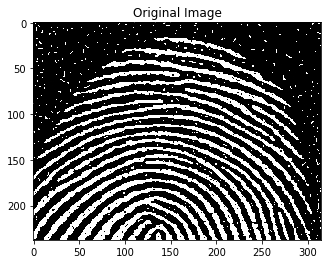

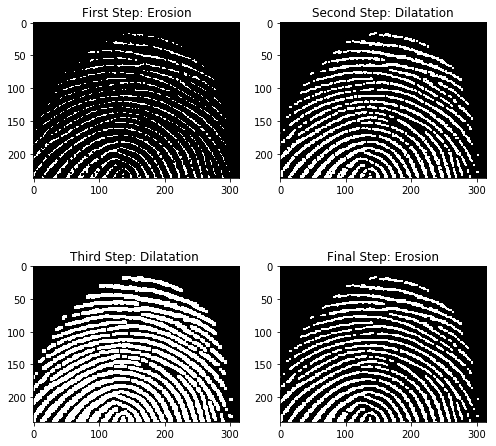



2 Step Function




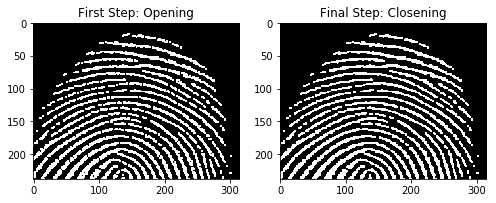



Comparing Final Results




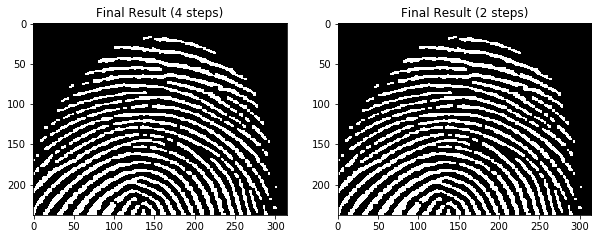

In [28]:
def FourStepMorphOps(img):
    #Create a square-shaped structuring element of size 3 by 3.
    SqrStruct=np.ones((3,3))
    #Erode the input image.
    eroded_img=cv2.erode(img,SqrStruct, iterations=1)
    #Dilate the result of b.
    dilated_img=cv2.dilate(eroded_img,SqrStruct,iterations=1)
    #Dilate the result of c.
    dilated2_img=cv2.dilate(dilated_img,SqrStruct,iterations=1)
    #Erode the result of d.
    eroded2_img=cv2.erode(dilated2_img,SqrStruct,iterations=1)
    
    plt.figure(figsize=(7,7))
    plt.subplot(2,2,1)
    plt.imshow(eroded_img,cmap='gray')
    plt.title('First Step: Erosion')
    plt.subplot(2,2,2)
    plt.imshow(dilated_img,cmap='gray')
    plt.title('Second Step: Dilatation')
    plt.subplot(2,2,3)
    plt.imshow(dilated2_img,cmap='gray')
    plt.title('Third Step: Dilatation ')
    plt.subplot(2,2,4)
    plt.imshow(eroded2_img,cmap='gray')
    plt.title('Final Step: Erosion')
    plt.tight_layout()
    plt.show()
    return eroded2_img
    
def TwoStepMorphOps(img):
    #Create a square-shaped structuring element of size 3 by 3.
    SqrStruct=np.ones((3,3))
    #Perform opening of the input image  (erosion followed by dilation).
    opened_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, SqrStruct)
    #Compute the closing of the result from b (dilation followed by erosion).
    closed_img = cv2.morphologyEx(opened_img, cv2.MORPH_CLOSE, SqrStruct)
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.imshow(opened_img,cmap='gray')
    plt.title('First Step: Opening')
    plt.subplot(1,2,2)
    plt.imshow(closed_img,cmap='gray')
    plt.title('Final Step: Closening')
    plt.tight_layout()
    plt.show()
    return closed_img
    
img=cv2.imread('noisy_fingerprint.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.show()
Final4_img=FourStepMorphOps(img)
print('\n')

print('2 Step Function')
print('\n')
plt.show()
Final2_img=TwoStepMorphOps(img)

#comparing final results
print('\n')
print('Comparing Final Results')
print('\n')
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(Final4_img,cmap='gray')
plt.title('Final Result (4 steps)')
plt.subplot(1,2,2)
plt.imshow(Final2_img,cmap='gray')
plt.title('Final Result (2 steps)')
plt.show()

### Implementación:
Se utilizaron las funciones erode(),dilate(),closening() y opening() que ejecutan las operaciones morfológicas necesarias para implementar la función
### Resultados:
En la primera función se aplican a la imagen las siguientes operaciones morfológicas: \begin{equation} Erosión \Rightarrow Dilatación \Rightarrow Dilatación \Rightarrow Erosión \end{equation} Por otro lado, la segunda función realiza opening y luego closening sobre la imagen. Al comparar los resultados se observan que son similares, esto se debe a que se realizan las mismas operaciones morfológicas, en ambas funciones. La segunda función realiza la misma operación morfológica que la primera, pues el proceso de opening consiste en una erosión seguida de una dilatación y el proceso de closening consiste en una dilatación seguida de una erosión. entonces, como: \begin{equation}opening=erosión \Rightarrow dilatación \end{equation} y \begin{equation} closening=dilatación \Rightarrow erosión \end{equation} podemos decir que \begin{equation} opening \Rightarrow closening=erosión \Rightarrow dilatación \Rightarrow dilatación \Rightarrow erosión \end{equation}

## Problem 2

Write a function that implements the region filling function discussed in class.
In this function you will need to use an interactive plot, so we need to disable <tt>inline</tt> plotting. This can be done with the following code:

In [12]:
%matplotlib qt5
#Instead of qt, error with Anaconda


The algorithm should proceed as follows:

1. Open and display the input binary image.
2. Using the <tt>plt.ginput</tt> function, specify a pixel within the region that you want to fill. Record the $(x, y)$ coordinate of the selected pixel.
3. Generate $X_0$, a binary image whose size is equal to the size of the input image. The pixel at the coordinate selected in the previous step should be set to 1, all other pixels should be set to zero.
4. Compute $X_k$ according to the following equation. Repeat until convergence, i.e. $X_k = X_{k-1}$
\begin{equation}
X_k=(X_{k-1} ⊕ B) ∩ A^c
\end{equation}

5. Compute the union between the final $X_k$ and the original image to fill the region.

Apply your function to the image <tt>spheres.jpg</tt> to fill in all the black circles.


In [37]:
#Source:
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
def filling(image,i,j):
    for i in range (17):
        #XO binary image
        X0 = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        X0[i,j] = 255
        #Computing Xk
        kernel = 255*cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)).astype(np.uint8)
        complement = 255-image
        conv_neg = True

        while (conv_neg):
            X_k_1 = X0.copy()
            X0 = cv2.dilate(X0,kernel,iterations=1)
            if (np.array_equal(X_k_1,X0)):
                conv_neg = False
        image_filled = np.bitwise_or(X0,image)
    return image_filled

#Open and display the input binary image
img=cv2.imread('spheres.jpg',cv2.IMREAD_GRAYSCALE) #Open binary image
fig = plt.figure();plt.imshow(img,cmap='gray');plt.title('Select a coordinate of the image')
input_c = plt.ginput(1)#Using plt.ginput() function.
#Specifying pixel
i = int(round(input_c[0][1])) #Column
j = int(round(input_c[0][0]))  #Row
plt.close(fig)


img_filled = filling(img,i,j)

#for i in range(16):
#    img_filled = filling(img_filled,i,j)
    
plt.figure()
plt.imshow(img,cmap='gray') #Display binary image
plt.title('Input binary image')
plt.show()

plt.figure()
plt.imshow(img_filled,cmap='gray')
plt.title('Filled Image')
plt.show()


C:\Users\Daniela\Anaconda3\lib\site-packages\matplotlib\backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


### Implementación:
La función filling() recibe únicamente como parámetros la imagen a rellenar, la fila y la columna del píxel escogido por el usuario de acuerdo al resultado de la función plt.ginput(). Se construye un vector de ceros donde solo se ubica 255 en la posición escogida por el usuario. Posteriormente se construye el kernel y el complemento de la imagen. 

Se procede a realizar la operación requerida. Con la función dilate() se realiza la convolución con Xk y Xk-1 hasta convergencia, finalmente se une la imagen original con Xk.

### Resultados:
Teniendo en cuenta que la imagen tiene 17 huecos y el proceso descrito en filling solo se realiza para una región, es necesario incluir un ciclo for en la función para que todos los huecos sean rellenados.

## Problem 3

Connected component labeling (also known as connected component analysis, blob extraction, region labeling, blob discovery, or region extraction) is an algorithm that uniquely labels connected components. The definition of connected components depends on the type of pixel adjacency used (pixel adjacency is defined and described in the book). In this problem, we will look at how the result of a connected component labeling algorithm changes when using 4-adjacency or 8-adjacency.

Write a function, <tt>labelConnectedComponents</tt>, which identifies and labels each connected component in a binary image. The function should take as an input the kind of adjacency to be used (either 4-adjacency or 8-adjacency). The function should also display the resulting connected components as shown below (particular coloring may differ). Apply this function to the images crosses.gif and chessboard.gif. Compare the connected components obtained when using 4-adjacency against those obtained when using 8-adjacency. Please comment your results: are these what you expected?

<b>Hint</b>: Use the functions <tt>cv2.findContours</tt> and <tt>cv2.drawContours</tt>. The following Wikipedia article is also a useful reference:
http://en.wikipedia.org/wiki/Connected_Component_Labeling

<img src="files/crosses.png"/>
<img src="files/connected.jpg"/>

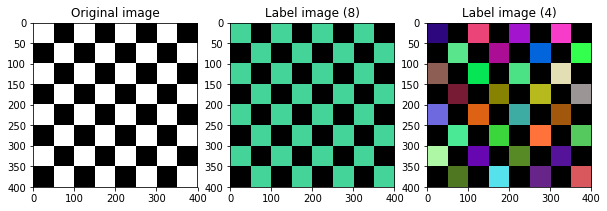

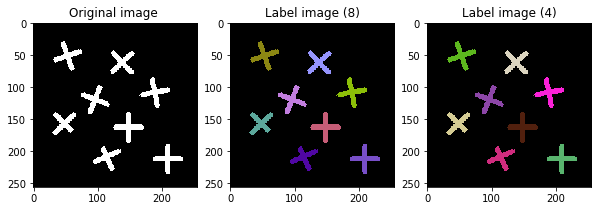

In [392]:
def labelConnectedComponents(img, adjacency): 
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,Binary_img=cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)
    mask=np.zeros((img.shape[0]+2,img.shape[1]+2),np.uint8)
    final=img.copy()
    for row in range(0,img.shape[0]):
        for column in range(0,img.shape[1]):
            if Binary_img[row,column]==255:
                r=random.randint(0,255)
                g=random.randint(0,255)
                b=random.randint(0,255)
                seed_point=(column,row)
                #Flood fill: Fills a connected component with the given color 
                #https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#floodfill
                #cv2.floodFill(image, mask, seedPoint, newVal[, loDiff[, upDiff[, flags]]])
                cv2.floodFill(final,mask,seed_point,(r,g,b),flags=adjacency)
    return final

img=cv2.imread('chessboard.png')
img2=cv2.imread('crosses.png')
final=labelConnectedComponents(img,8)
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(final)
plt.title('Label image (8)')
plt.subplot(1,3,3)
final=labelConnectedComponents(img,4)
plt.imshow(final)
plt.title('Label image (4)')
plt.show()
final=labelConnectedComponents(img2,8)
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img2)
plt.title('Original image ')
plt.subplot(1,3,2)
plt.imshow(final)
plt.title('Label image (8)')
final=labelConnectedComponents(img2,4)
plt.subplot(1,3,3)
plt.imshow(final)
plt.title('Label image (4)')
plt.show()



### Implementación
La función floodFill() permite llenar un componente connectado con un color dado, tal como lo indica en la documentación (https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#floodfill). Esta función es de gran utilidad para llevar a cabo el problema propuesto pues identifica componentes conectados con valores de conectividad 4 u 8. En este caso primero se encuentra umbraliza la imagen y se busca un pixel blanco, cuando se encuentra, se utiliza está posicion como punto de partida (seed_point). Para el funcionamiento de la función es necesario definir una máscara que sea 2 pixeles más alta y más ancha que la imagen de entrada a la función. El proceso de etiquetado se realiza aleatoriamente, con la función random.ranint() se obtienen valores aleatorios para el color de los pixeles de el componente conectado.

### Resultados:
Se observa que cuando los elementos, que no pertencen al fondo, están bastante separados, la conectividad no afecta mucho el resultado, sin embargo cuando cuando los elementos están juntos, dependiendo de la conectividad el algoritmos puede determinar diferentes componentes conectados, esto se observa en el caso de chessboard.png. En esta imagen cuando la conectividad es 8 las casillas blancas forman un solo componente conectado, mientras que con conectividad 4 cada casilla blanca es un componente diferente.

## Problem 4

The blog ‘Steve on Image Processing’ contains useful information about image processing with MATLAB. One of Steve’s posts talks about using morphological operations to identify characters containing a tall vertical segment. The post is at:
http://blogs.mathworks.com/steve/2008/07/14/opening-by-reconstruction/

Replicate the results with Python and OpenCV. You may find that the functions <tt>cv2.findContours</tt> and <tt>cv2.floodFill</tt> are useful for this.

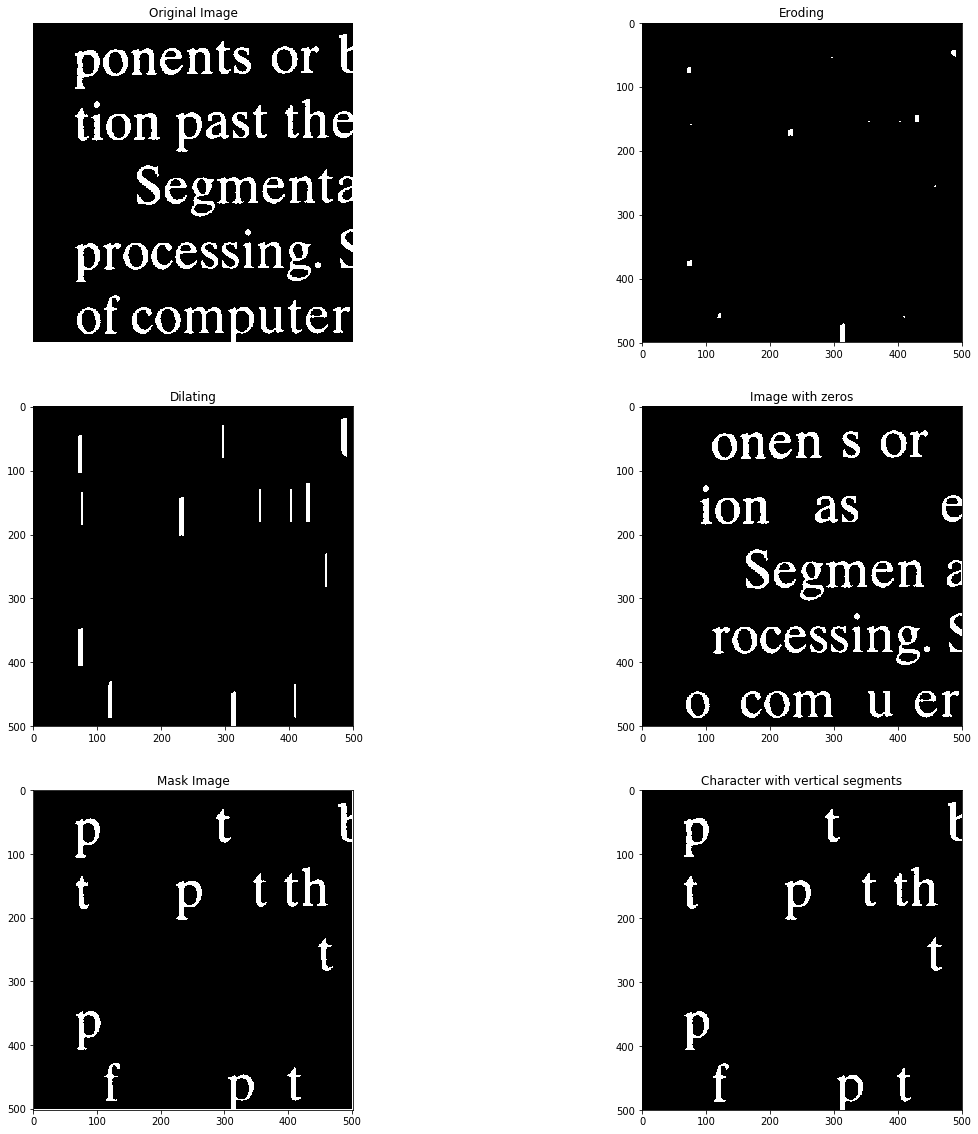

In [22]:
#Using matplotlib inline
%matplotlib inline

def vertical_segment(image):
    v_s_e = np.ones((51,1), np.uint8) #Vertical structuring element
    eroded = cv2.erode(image, v_s_e) #Eroding with the vertical structuring element
    dilated_img=cv2.dilate(eroded,v_s_e,iterations=1) #Dilating the eroded image with the vertical structuring element

    image2 = image.copy() #Copying image
    mask = np.zeros((image.shape[0]+2 ,image.shape[1]+2), np.uint8) #Creating mask
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(eroded[i,j] > 0): #If a vertical element is detected
                cv2.floodFill(image2, mask,(j,i), 0) #Fill with 0
    image = image - image2 #Original image without the characters found
    return image2, mask, image, eroded, dilated_img

img = cv2.imread("steve_blog.png", cv2.IMREAD_GRAYSCALE)
img2, mask, final, eros, dil = vertical_segment(img)


plt.figure(figsize=(20,20)); 
plt.subplot(3,2,1); plt.imshow(img, cmap='gray'); plt.title("Original Image");plt.axis('off')
plt.subplot(3,2,2); plt.imshow(eros, cmap='gray'); plt.title("Eroding")
plt.subplot(3,2,3); plt.imshow(dil, cmap='gray'); plt.title("Dilating")
plt.subplot(3,2,4); plt.imshow(img2, cmap='gray'); plt.title("Image with zeros")
plt.subplot(3,2,5); plt.imshow(mask, cmap='gray'); plt.title("Mask Image")
plt.subplot(3,2,6); plt.imshow(final, cmap='gray'); plt.title("Character with vertical segments")

### Implementación:
La función vertical_segment() recibe únicamente como parámetro la imagen a identificar. Siguiendo el procedimiento descrito en el blog de Steve, pero con funciones propias de de OpenCV como erode(), dilate() y floodFill se le aplicó a la imagen el procedimiento de erode y dilate para construir la máscara.

### Resultados:
Tal como en el blog de Steve se evidencia paso a paso el proceso a seguir, desde la identificación de los segmentos hasta la construcción de la máscara y posterior resta de imágenes. Analizando las imágenes, se obtienen resultados muy similares, dado que se realiza el mismo procedimiento. 

## Problem 5 

Write a function that detects edges in an image using Canny’s method, which is available in the function <tt>cv2.Canny</tt>.
Your function should first smooth the image using a Guassian filter, which you can do with <tt>cv2.GaussianBlur</tt>.
Try out Canny's method with different sizes the smoothing kernel and analyze the results.
Also, try changing the thresholds in the edge detection process. What are the effects of each parameter?

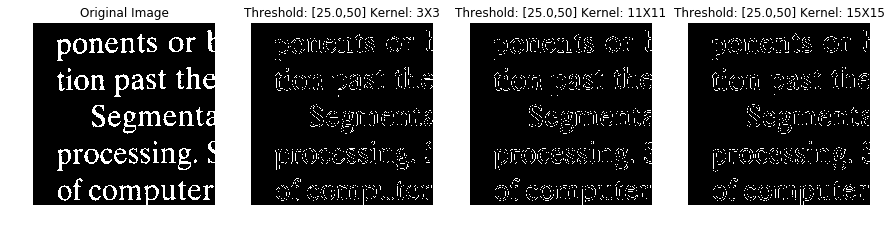

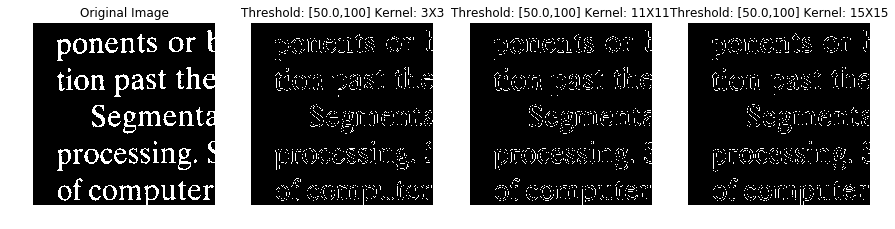

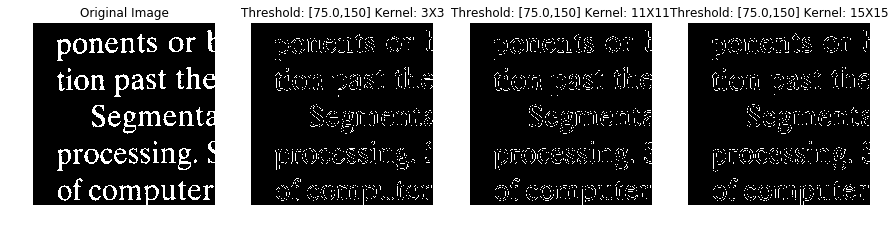

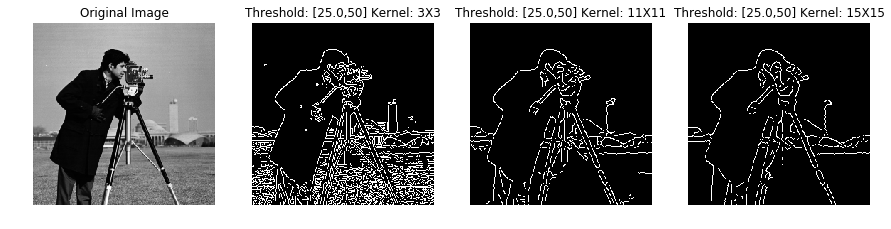

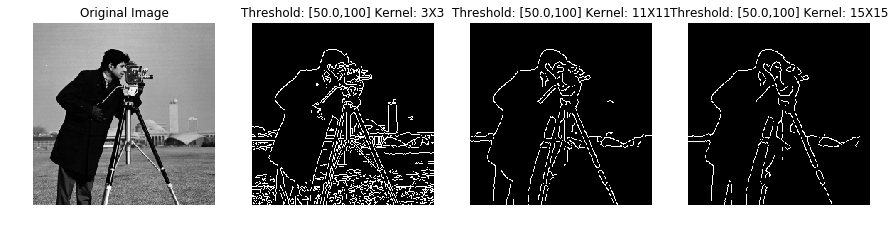

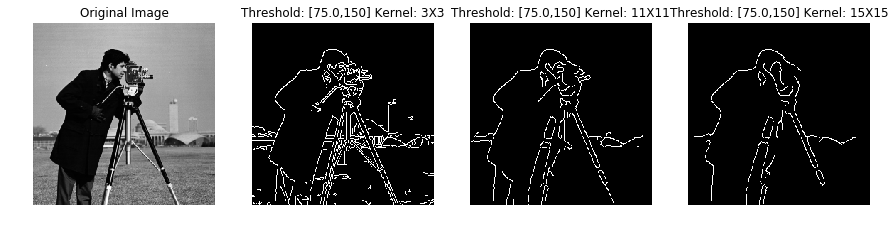

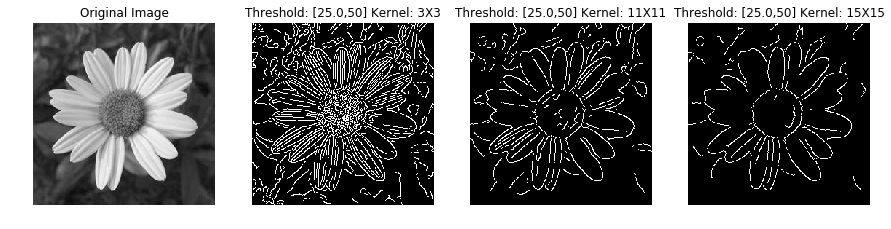

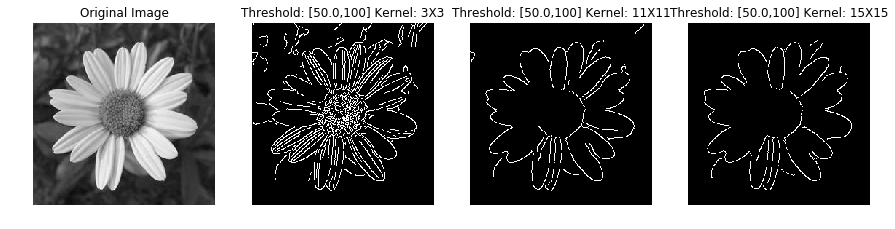

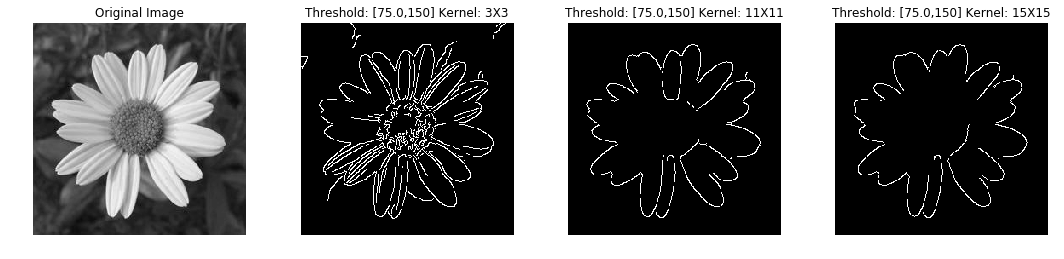

In [11]:
def Edgedetector(img,KernelSize,HThreshold):
    #smooth the image
    Blurred_img=cv2.GaussianBlur(img,(KernelSize,KernelSize),0)
    Edge_image=cv2.Canny(Blurred_img,HThreshold-0.5*HThreshold,HThreshold)
    return Edge_image
files=['steve_blog.png', 'cameraman.png', 'flower.jpg']
th=[50,100,150]
K_size=[3,11,15] #Kernel sizes can not be even
for i in range(0,len(files)):
    img=cv2.imread(files[i],cv2.IMREAD_GRAYSCALE)
    for j in range(0,len(th)):
        plt.figure(figsize=(15,15))
        plt.subplot(1,4,1)
        plt.imshow(img,cmap='gray')
        plt.title('Original Image')
        plt.axis('off')
        for k in range (0,len(K_size)):
            Edge=Edgedetector(img,K_size[k],th[j])
            plt.subplot(1,4,k+2)
            plt.imshow(Edge,cmap='gray')
            plt.title('Threshold: [%s,%s] Kernel: %sX%s' % (0.5*th[j],th[j],K_size[k],K_size[k]))
            plt.axis('off')
plt.tight_layout()
plt.show()
            

### implementación:
Se utilizan las funciones recomendadas para solucionar el problema planteado
### Resultados:
Se observa que al aumentar el tamaño del kernel, que realiza el suavizado gaussiano, se pierden detalles y también los bordes de la imagen. Lo anterior explica porque en imagenes con los mismos valores de umbral, pero diferente tamaño de kernel, se detectan menos bordes. También, se observa que para valores con umbrales, más altos. pero igual tamaño de kernel, se detectan menos bordes, esto se debe a que a mayor umbral son más las regiones que se combinan, eliminando bordes en la imagen. 

## Problem 6

Write a function that uses the Hough Transform algorithm for line detection. You can use the implementation available in OpenCV <tt>cv2.HoughLines</tt> in your function. Note that this function returns lines in the $(\rho, \theta)$ space, so you need to perform the appropiate conversions before plotting them.

Run the line detection function on an edge map obtained using Canny's method. Display the detected lines on top of the input image. You should use several images for your tests, including <tt>building.jpg</tt>.

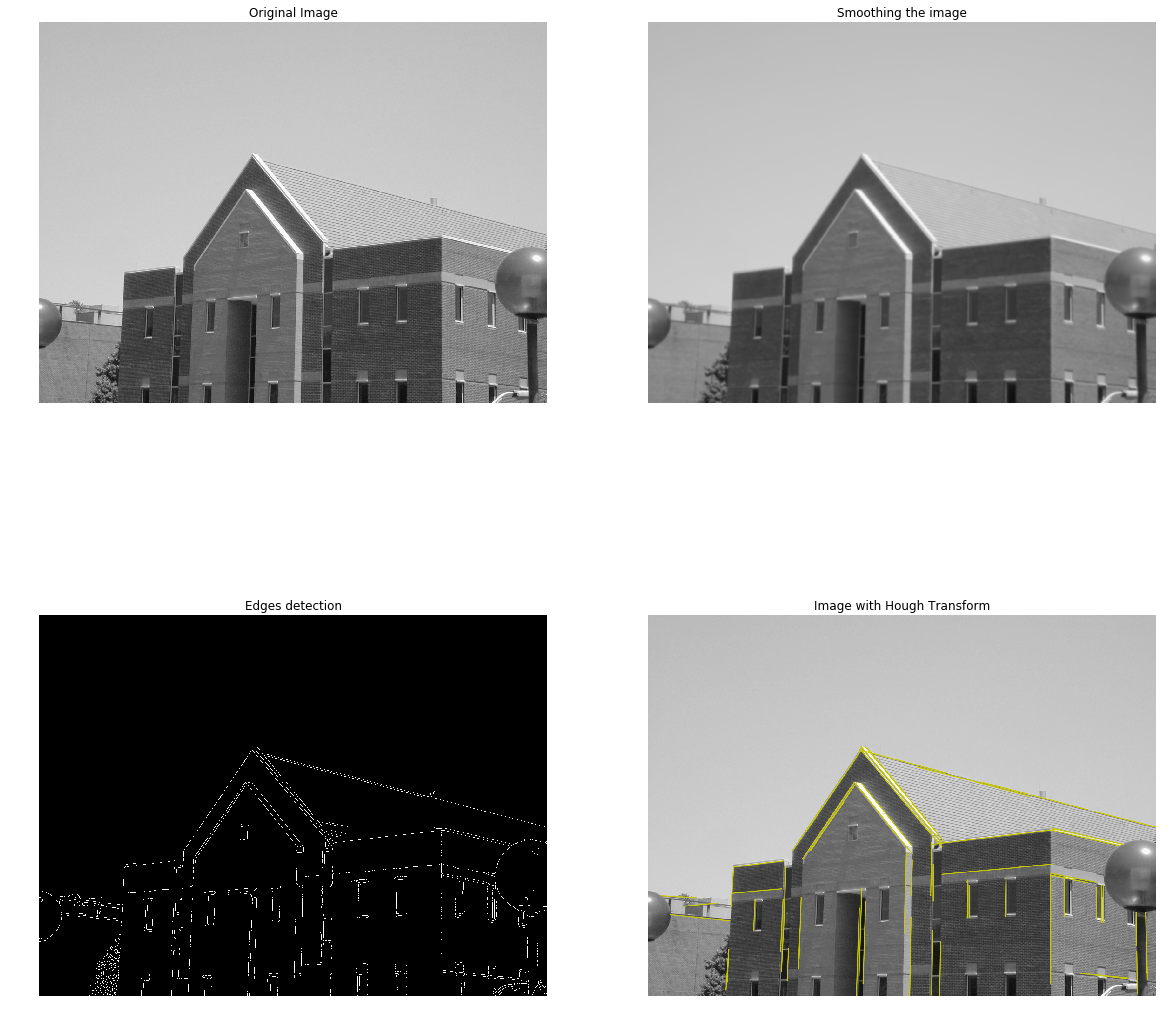

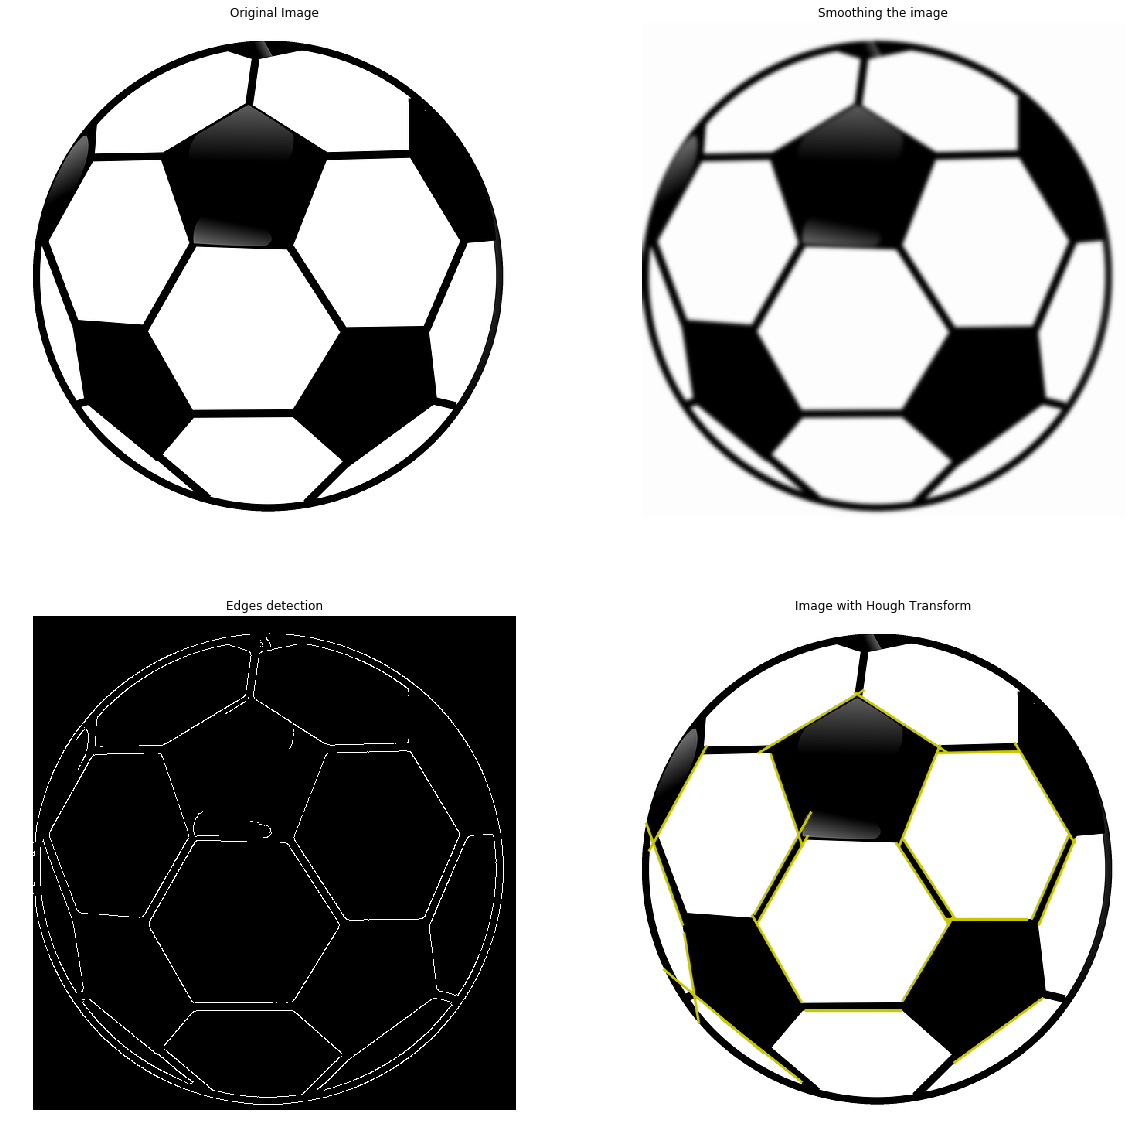

In [38]:
%matplotlib inline   


def Hough_Transform(img):
    gau_blu=cv2.GaussianBlur(img,(15,15),2.6) #Smooth the image with Guassian filter
    edge_det = cv2.Canny(gau_blu,20,40) #Detects edges using Canny’s method
    h_lines = cv2.HoughLinesP(image=edge_det,rho=1.6,theta=np.pi/180,threshold=90,minLineLength=100,maxLineGap=20)
    for i in range(h_lines.shape[0]):
        cv2.line(img, (h_lines[i][0][0], h_lines[i][0][1]), (h_lines[i][0][2], h_lines[i][0][3]), (200, 200, 0), 2, cv2.LINE_AA)# Draw lines
    return gau_blu, edge_det,img

image= cv2.imread('building.jpg')#Load Image
image_copy= image.copy() #Copy image to send only the copy.
blurr, image_ed,img_ht=Hough_Transform(image_copy)#Call function
        
plt.figure(figsize=(20,20));
plt.subplot(2,2,1); plt.imshow(image, cmap = 'gray');plt.title('Original Image');plt.axis('off') #Display the original image
plt.subplot(2,2,2); plt.imshow(blurr, cmap = 'gray');plt.title('Smoothing the image');plt.axis('off') #Display the original image
plt.subplot(2,2,3); plt.imshow(image_ed, cmap = 'gray');plt.title('Edges detection');plt.axis('off') #Display the edge detection image
plt.subplot(2,2,4); plt.imshow(img_ht, cmap = 'gray');plt.title('Image with Hough Transform');plt.axis('off') #Display the image
plt.show()

image= cv2.imread('soccer-ball.png')#Load Image
image_copy= image.copy() #Copy image to send only the copy.
blurr, image_ed,img_ht=Hough_Transform(image_copy)#Call function
        
plt.figure(figsize=(20,20));
plt.subplot(2,2,1); plt.imshow(image, cmap = 'gray');plt.title('Original Image');plt.axis('off') #Display the original image
plt.subplot(2,2,2); plt.imshow(blurr, cmap = 'gray');plt.title('Smoothing the image');plt.axis('off') #Display the original image
plt.subplot(2,2,3); plt.imshow(image_ed, cmap = 'gray');plt.title('Edges detection');plt.axis('off') #Display the edge detection image
plt.subplot(2,2,4); plt.imshow(img_ht, cmap = 'gray');plt.title('Image with Hough Transform');plt.axis('off') #Display the image
plt.show()

### Implementación:
La función Hough_Transform() recibe únicamente como parámetros la imagen a rellenar. Se realiza un suavizado gaussiano, detección de bordes utilizando el método de Canny y con la función HoughLines se obtienen las respectivas líneas de borde. 

### Resultados:
A pesar de que en la imagen del balón se marcan más los bordes, el valor de umbral especificado no detecta los botdes superiores. De igual forma, se observa un suavizado externo al filtro asociado a la imagen original. Sin embargo, la imagen del paisaje es favorecida con los bordes, debido a que zonas como el el interior del techo no son detectadas.

## Problem 7

Write a function that implements a simple adaptive thresholding algorithm as described below:

1. Select an initial estimate for $T$. A good initial value for $T$ would be equal to the average of the maximum and minimum intensity value of the image.
2. Threshold the image using $T$. This produces two groups: $G_1$, with pixels whose intensity is equal or less than $T$; and $G_2$, with pixels whose intensity is greater than $T$.
3. Compute the intensity averages $\mu_1$ and $\mu_2$ for the pixels in regions $G_1$ and $G_2$.
4. Compute a new threshold value
\begin{equation}
T=\frac{\mu_1 + \mu_2}{2}
\end{equation}

5. Repeat steps 2-4 until the difference in $T$ between successive iterations is less than a predefined parameter $T_0$.

Apply your function to the image <tt>fingerprint.jpg</tt>. Analyze your results.


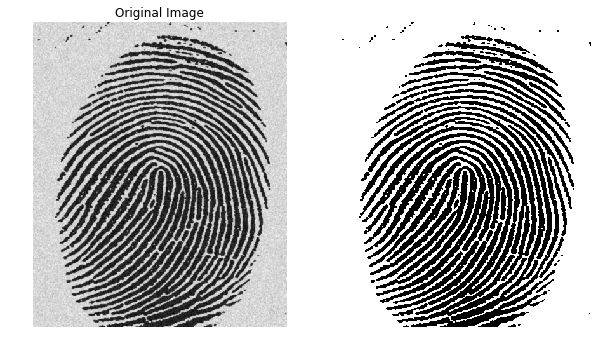

Treshold=125.401779002


In [12]:
def AdaptativeThresholding(img,T0):
    #compute the average intensity
    T=(img.max()+img.min())*0.5
    Tnew=T
    repeat=True
    while repeat:
        #Threshold the image
        T=Tnew
        ret,thresholded_img=cv2.threshold(img.copy(), T, 255.0, cv2.THRESH_BINARY)
        #Compute u_1 y u_2
        u_1=0
        c1=0
        c2=0
        u_2=0
        for row in range(0,img.shape[0]):
            for column in range(0,img.shape[1]):
                if thresholded_img[row,column]==0:
                    #average intensity of G1
                    u_1=u_1+img[row,column]
                    c1=c1+1
                else:
                    #average intensity of G2
                    u_2=u_2+img[row,column]
                    c2=c2+1
        u_1=u_1/c1
        u_2=u_2/c2     
        #Compute a new Threshold value
        Tnew=(u_1+u_2)*0.5

        if abs(Tnew-T)<T0:
            repeat=False
        else:
            repeat=True
    return thresholded_img,Tnew
img=cv2.imread('fingerprint.jpg',cv2.IMREAD_GRAYSCALE)     
th_img,Tnew=AdaptativeThresholding(img,10**-4)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(th_img,cmap='gray')
plt.axis('off')
plt.show()
print('Treshold=%s' % (Tnew))

### Implementación:

Se realiza la umbralización de la imagen con el valor promedio de intensidad, Luego se obtienen los promedios para lso dos grupos utilizando un ciclo para. En el ciclo se obtienen la cantidad de pixeles con intensidad por debajo, y por arriba, del umbral y la suma de sus intensidades. Luego, se calcula el promedio de cada uno para ser usados nuevos para calcular el nuevo valor de umbral. El proceso se repite hasta que no haya un cambio mayor a T0 entre dos umbrales consecutivos.

### Resultados: 
Se oberva, un buen resultado con la técnica utilizada. El valor de umbral obtenido es de 125.4. se puede probar que al cambiar el valor de umbral inicial se obtienen un resultado similar.

## Problem 8

Write a function that uses the $k$-means algorithm to perform image segmentation using RGB pixel colors as features.
Write also a variant of this segmentation approach that uses the H and S components of each pixel represented in the HSI color space. Here, you should use normalized H and S values, so that both variables range between 0 and 1.
Apply your functions to the image <tt>mms.jpg</tt>. Select an appropriate value of $k$.


(-0.5, 499.5, 427.5, -0.5)

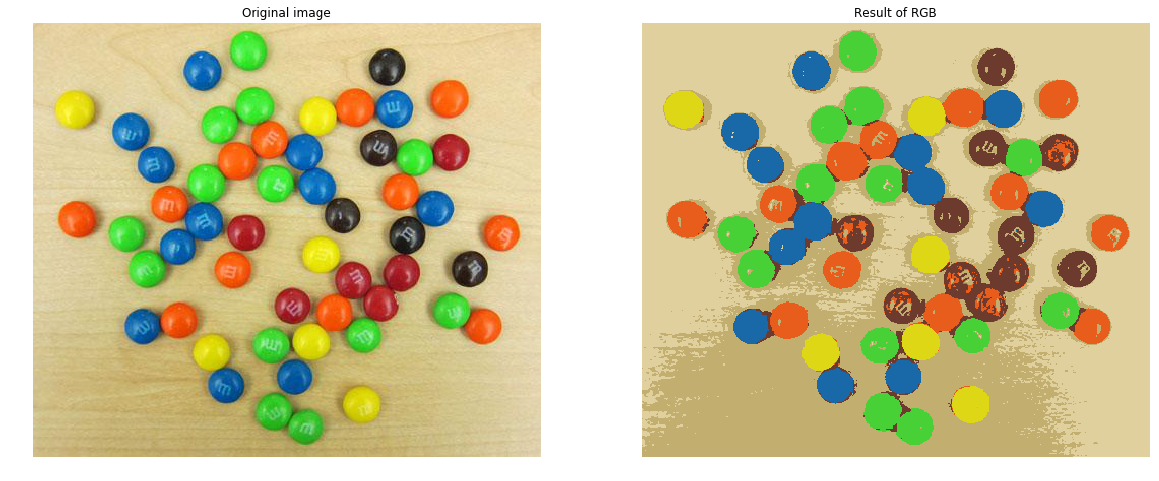

In [57]:
#Using matplotlib inline
%matplotlib inline

#Source 
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html

#FROM PS3
#function that converts an image from RGB to HSI
def RGB2HSI(img):
    #Getting R,G and B
    R=img[:,:,0];G=img[:,:,1];B=img[:,:,2]
    #Normalizing R,G and B
    R=R/255;G=G/255;B=B/255
    H=np.zeros(R.shape)
    S=np.zeros(R.shape)
    I=np.zeros(R.shape)
    #Getting the HSI components Based on the book Digital Image Processing (Gonzalez & Woods)
    #(small number added in the denominator)
    arg=(0.5*((R-G)+(R-B)))/(10**-100+(R-G)**2+(R-B)*(G-B))**0.5
    theta=np.arccos(arg)
    theta=np.rad2deg(theta)
    for row in range(0,H.shape[0]):
        for column in range(0,H.shape[1]):
            #Getting the H component
            if B[row,column]<=G[row,column]:
                H[row,column]=theta[row,column]
            else:
                H[row,column]=360-theta[row,column]
            #Getting the S component 
            #(small number added in the denominator)
            S[row,column]=1-3/(10**-100+R[row,column]+G[row,column]+B[row,column])*min(R[row,column],G[row,column],B[row,column])
    #Getting the I cmponent
    I=1/3*(R+G+B)
    return cv2.merge((H,S,I))
#function that converts an image from HSI to RGB
def HSI2RGB(imghsi):
    H=imghsi[:,:,0]
    S=imghsi[:,:,1]
    I=imghsi[:,:,2]
    #Normalizing HSI components
    Hnorm=H/360
    S=S
    I=I
    #converting H into radians
    Hrad=np.deg2rad(H)
    H120=np.deg2rad(H-120)
    H240=np.deg2rad(H-240)
    #defining R,G,B
    R=np.zeros(H.shape)
    G=np.zeros(H.shape)
    B=np.zeros(H.shape)
    for row in range(0,H.shape[0]):
            for column in range(0,H.shape[1]):
                if 0<=H[row,column]<120:
                    B[row,column]=I[row,column]*(1-S[row,column])
                    R[row,column]=I[row,column]*(1+(S[row,column]*np.rad2deg(np.cos(Hrad[row,column])))/(np.rad2deg(np.cos(60*np.pi/180-Hrad[row,column]))))
                    G[row,column]=3*I[row,column]-(R[row,column] + B[row,column])
                elif 120<=H[row,column]<240:
                    R[row,column]=I[row,column]*(1-S[row,column])
                    G[row,column]=I[row,column]*(1+(S[row,column]*np.rad2deg(np.cos(H120[row,column])))/(np.rad2deg(np.cos(60*np.pi/180-H120[row,column]))))
                    B[row,column]=3*I[row,column]-(R[row,column]+G[row,column])
                elif 240<=H[row,column]<=360:
                    G[row,column]=I[row,column]*(1-S[row,column])
                    B[row,column]=I[row,column]*(1+(S[row,column]*np.rad2deg(np.cos(H240[row,column])))/(np.rad2deg(np.cos(60*np.pi/180-H240[row,column]))))
                    R[row,column]=3*I[row,column]-(G[row,column]+B[row,column])
    return cv2.merge((R,G,B))


#Function for Segmentation
def ImageSegmentation(img):
    Z = np.float32(img.reshape((-1,3))) #Save all features in one vector and convert to float.
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) #Criterion
    ret,label,center=cv2.kmeans(Z,7,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS) #Kmeans function
    
    #Convert the image to uint8 form
    center = np.uint8(center)
    out = center[label.flatten()].reshape((image.shape))
    
    return out

image =  cv2.imread("mms.jpg")
segm_rgb = ImageSegmentation(image) #Calling the function. Input: image

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
segm_rgb = cv2.cvtColor(segm_rgb, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20));
plt.subplot(1,2,1); plt.imshow(image); plt.title("Original image");plt.axis('off')
plt.subplot(1,2,2); plt.imshow(segm_rgb); plt.title("Result of RGB");plt.axis('off')



In [ ]:
image_hsi = RGB2HSI(image) # convert the image to HSI
segm_hsi = ImageSegmentation(image_hsi) #Using Segmentation

plt.figure(figsize=(20,20)); 
plt.subplot(1,2,1); plt.imshow(image); plt.title("Original image");plt.axis('off')
plt.subplot(1,2,2); plt.imshow(segm_hsi); plt.title("Result of HSI");plt.axis('off')

### Implementación:

Se realiza la función Image_Segmentation en la que se construyen los parámetros de entrada de la función kmeans de acuerdo a la documentación de OpenCV. Con las variables de salida de la función kmeans, se reconstruye nuevamente la función. Cabe destacar que en la función kmeans se utilizó como parámetro k el número 7, es decir, 6 colores para los dulces y el fondo.
### Resultados: 
Se oberva, un buen resultado con la técnica utilizada. Sin embargo, se reconocen los bordes de los dulces como marrón teniendo en cuenta los valores de los píxeles.